<img src="seekingalpha.png" style="float: left; margin: 20px; height: 55px">

# Notebook 6- Exploratory Data Analysis

### _EDA for "Final" DataFrame compiled in Notebook 5_

---
### Notebook Summary 
> - Checking for null or duplicated values
> - Datatype conversion utilizing the Pandas "datetime" functionality
> - Filtering out incorrect 'Ticker' lengths 'Editor's Picks'
> - Investigating feature frequencies, distributiins, and summary statistics 
> - Creating Long and Short Portfolios 
> - Compiling "Final Ideas" DataFrame, saving and exporting as csv file for accessibility throughout the remainder of the notebooks

- Leveraging the Pandas library to compile 'Final Ideas' Dataframe that will be exported as a csv file to be used in subsequent notebooks.

---
### _Importing Necessary Libraries_
---

In [1]:
# EDA/Data Mining
import pandas as pd
import numpy as np


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Setting style
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### _Importing "Final" Dataframe_
----

In [2]:
final = pd.read_csv('final.csv')  # Compiled in Notebook 5 

In [3]:
final.head(3)  # Printing first few rows of observations

,Unnamed: 0,Authors,Link,Title,Strategy,Tickers,Opening Price,Week 1,Week 2,Week 3,...,Week 42,Week 43,Week 44,Week 45,Week 46,Week 47,Week 48,Week 49,Week 50,Week 51
0,0,Paulo Santos,/article/4038275-apple-unexpected-positive-app...,Apple: An Unexpected Positive Appears,Long,AAPL,120.0,120.080002,121.629997,130.289993,...,174.25,173.970001,169.979996,174.089996,169.800003,172.669998,176.419998,170.570007,116.150002,118.989998
1,1,Mark Hibben,/article/4038269-apple-renewing-mac-focus-new-...,Apple: Renewing Mac Focus In The New Year,Long,AAPL,120.0,120.080002,121.629997,130.289993,...,174.25,173.970001,169.979996,174.089996,169.800003,172.669998,176.419998,170.570007,116.150002,118.989998
2,2,Rinse Terpstra,/article/4037413-apple-user-base,Apple: It's All About The User Base,Long,AAPL,120.0,120.080002,121.629997,130.289993,...,174.25,173.970001,169.979996,174.089996,169.800003,172.669998,176.419998,170.570007,116.150002,118.989998


### _Checking for null or duplicated data_
----

In [4]:
final.isnull().sum() # Checking for missing data

Unnamed: 0       0
Authors          0
Link             0
Title            0
Strategy         0
Tickers          0
Opening Price    0
Week 1           0
Week 2           0
Week 3           0
Week 4           0
Week 5           0
Week 6           0
Week 7           0
Week 8           0
Week 9           0
Week 10          0
Week 11          0
Week 12          0
Week 13          0
Week 14          0
Week 15          0
Week 16          0
Week 17          0
Week 18          0
Week 19          0
Week 20          0
Week 21          0
Week 22          0
Week 23          0
Week 24          0
Week 25          0
Week 26          0
Week 27          0
Week 28          0
Week 29          0
Week 30          0
Week 31          0
Week 32          0
Week 33          0
Week 34          0
Week 35          0
Week 36          0
Week 37          0
Week 38          0
Week 39          0
Week 40          0
Week 41          0
Week 42          0
Week 43          0
Week 44          0
Week 45          0
Week 46     

In [5]:
final.duplicated().sum()  # Checking for duplicated data 

0

In [6]:
final.drop('Unnamed: 0',axis=1,inplace=True)  # Dropping duplicate indexing column

### _Converting Datatypes_
---
- No need for conversion : 
> - Categorical columns stored as objects
> - Numerical columns stored as floats

In [7]:
final.dtypes  # Inspecting datatypes 

Authors           object
Link              object
Title             object
Strategy          object
Tickers           object
Opening Price    float64
Week 1           float64
Week 2           float64
Week 3           float64
Week 4           float64
Week 5           float64
Week 6           float64
Week 7           float64
Week 8           float64
Week 9           float64
Week 10          float64
Week 11          float64
Week 12          float64
Week 13          float64
Week 14          float64
Week 15          float64
Week 16          float64
Week 17          float64
Week 18          float64
Week 19          float64
Week 20          float64
Week 21          float64
Week 22          float64
Week 23          float64
Week 24          float64
Week 25          float64
Week 26          float64
Week 27          float64
Week 28          float64
Week 29          float64
Week 30          float64
Week 31          float64
Week 32          float64
Week 33          float64
Week 34          float64


## _Calculating Price Changes_
--- 
### Long Portfolio

In [8]:
# Subsetting "Performance" to include only Long Portfolio stocks

long_performance = final[final['Strategy']=='Long']

In [9]:
# Creating new variables representing monthly price changes
    # Subtract appropriate 'Week _" pricing from 'Opening Price

one    = long_performance['Week 4'] - long_performance['Opening Price']
two    = long_performance['Week 8'] - long_performance['Opening Price']
three  = long_performance['Week 12'] - long_performance['Opening Price']
four   = long_performance['Week 16'] - long_performance['Opening Price']
five   = long_performance['Week 20'] - long_performance['Opening Price']
six    = long_performance['Week 24'] - long_performance['Opening Price']
seven  = long_performance['Week 28'] - long_performance['Opening Price']
eight  = long_performance['Week 32'] - long_performance['Opening Price']
nine   = long_performance['Week 36'] - long_performance['Opening Price']
ten    = long_performance['Week 40'] - long_performance['Opening Price']
eleven = long_performance['Week 48'] - long_performance['Opening Price']
twelve = long_performance['Week 51'] - long_performance['Opening Price']

In [10]:
# Transorming new variables from above into columns on dataframe

long_closing_prices = pd.DataFrame({'1 Month': one,  '2 Month': two, '3 Month': three, '4 Month': four,
                                    '5 Month': five, '6 Month': six, '7 Month': seven, '8 Month': eight,
                                    '9 Month': nine, '10 Month': ten, '11 Month': eleven, '12 Month': twelve})

# Re-ordering columns

long_closing_prices = long_closing_prices [['1 Month', '2 Month', '3 Month', '4 Month',
                                            '5 Month', '6 Month', '7 Month', '8 Month',
                                            '9 Month', '10 Month', '11 Month', '12 Month']]

In [11]:
# Specifying aggregate functions to be applied to each column 

aggs = {'1 Month' : 'mean', '2 Month' : 'mean', '3 Month' : 'mean', '4 Month' : 'mean',
        '5 Month' : 'mean', '6 Month' : 'mean', '7 Month' : 'mean', '8 Month' : 'mean',
        '9 Month' : 'mean', '10 Month': 'mean', '11 Month': 'mean', '12 Month': 'mean'} 

# Applying aggregate functions to dataframe
long_closing_prices = long_closing_prices.agg(aggs)
long_closing_prices # Inspecting progress

1 Month     -8.351600
2 Month    -13.485133
3 Month    -14.610636
4 Month    -14.978728
5 Month     -0.159844
6 Month     37.300664
7 Month     23.181847
8 Month     30.729983
9 Month     53.723919
10 Month    46.293748
11 Month    18.766886
12 Month     6.905513
dtype: float64

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 9 Text yticklabel objects>)

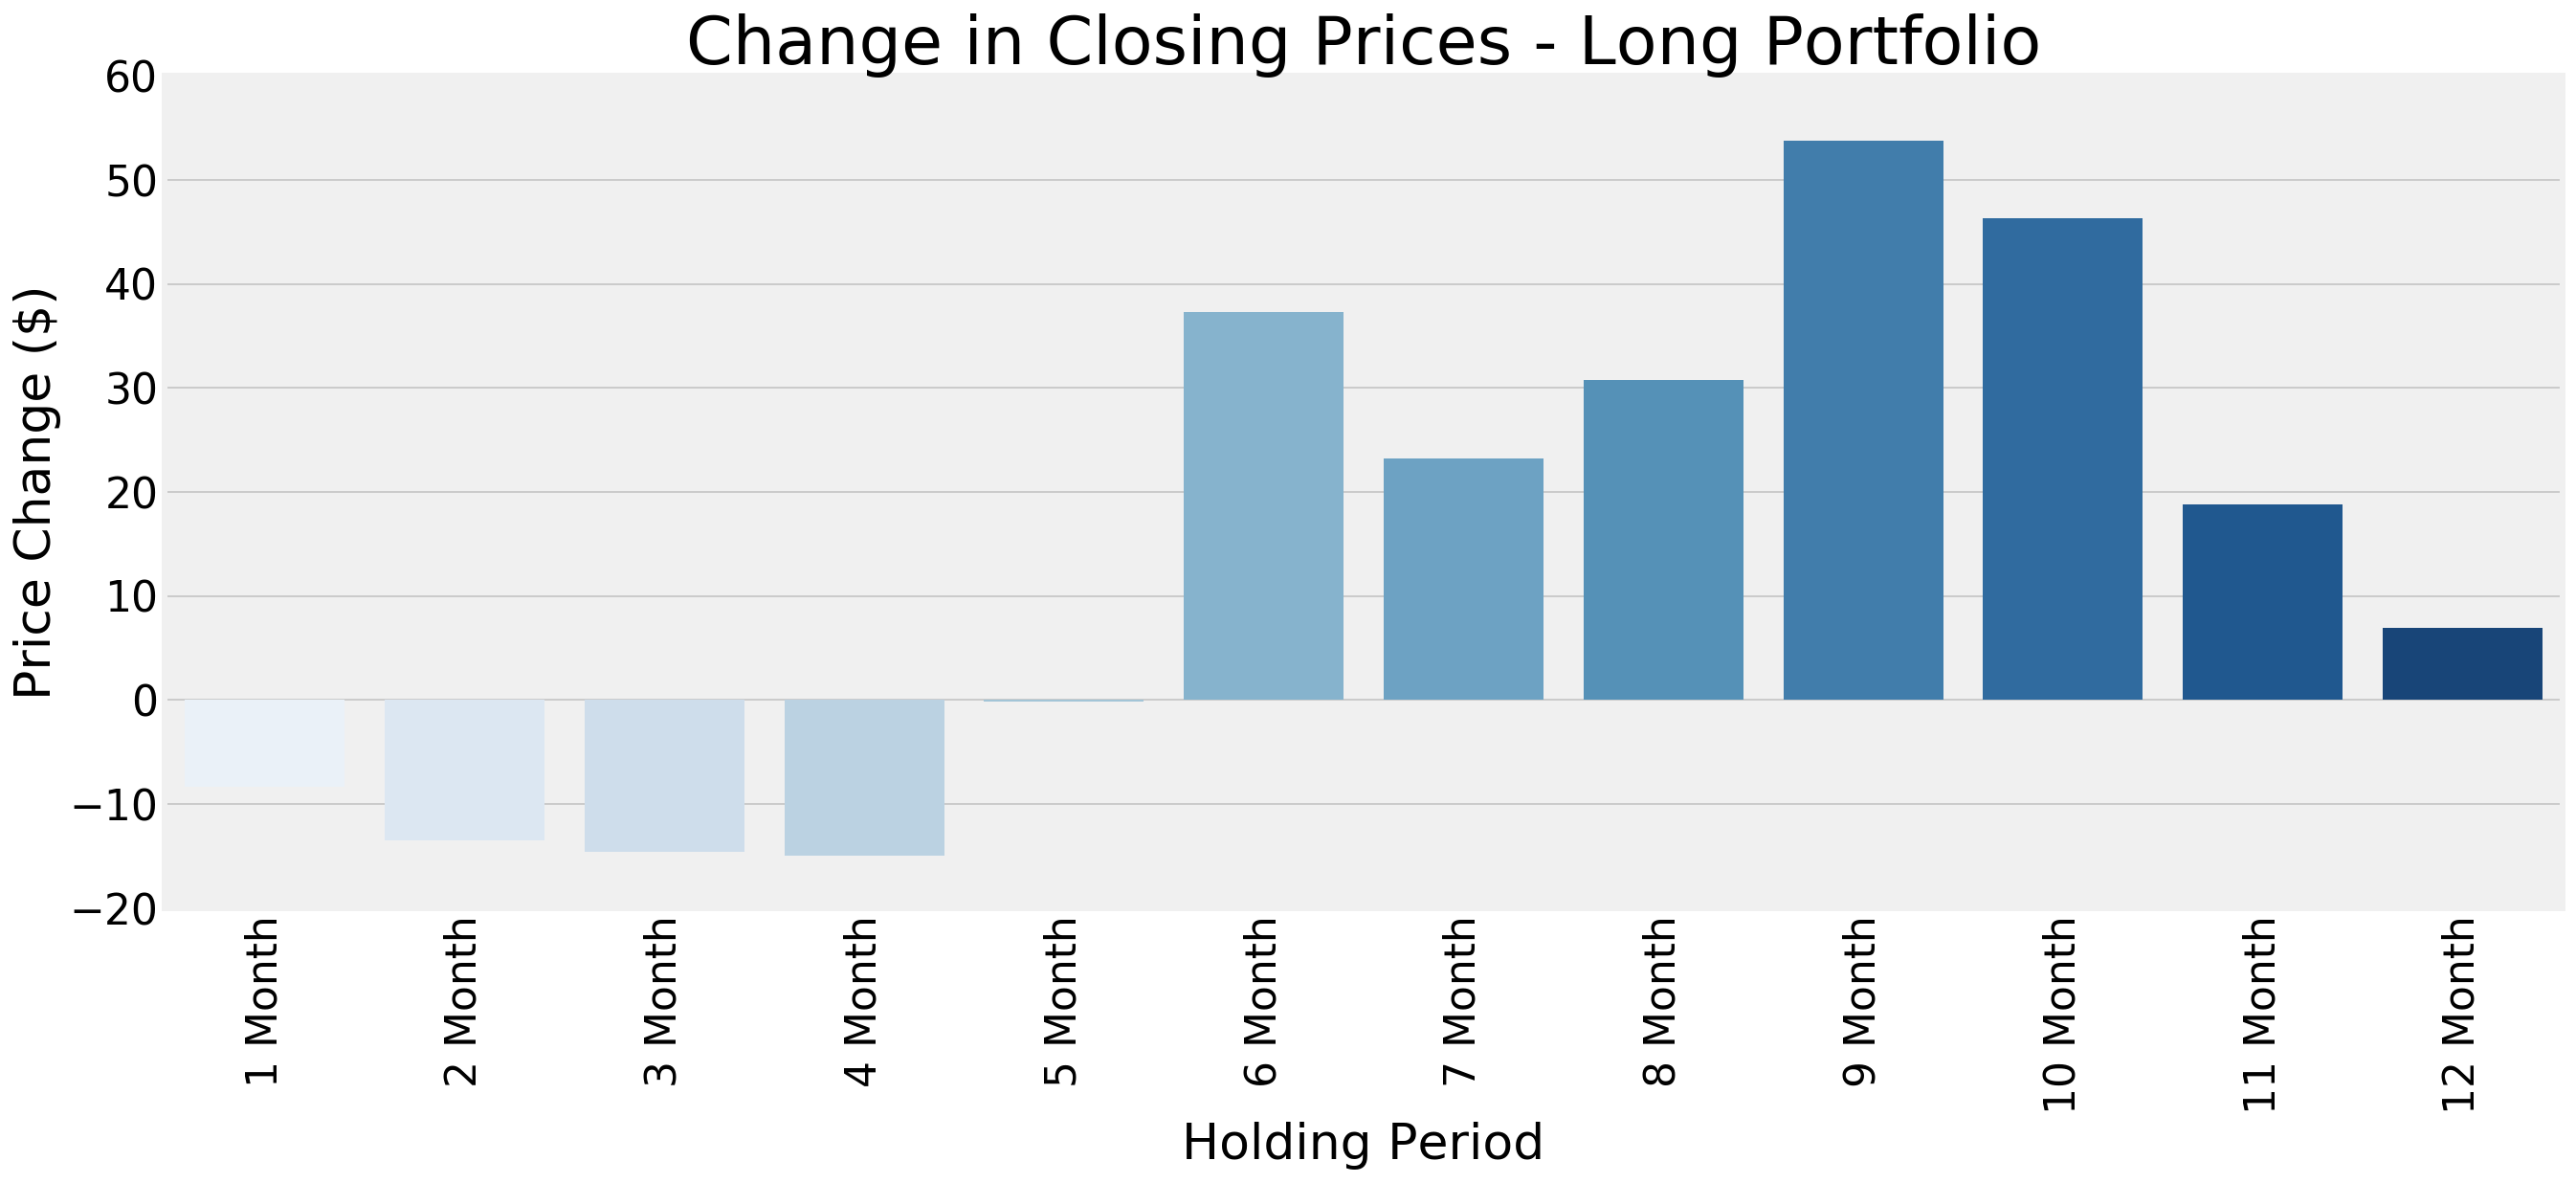

In [32]:
# Creating bar graph to visualize Long Portfolio

x = long_closing_prices.index
y = long_closing_prices.values

plt.figure(figsize=(20,8))
sns.barplot(x = x, y = y,palette='Blues')


plt.title('Change in Closing Prices - Long Portfolio',fontsize=35)
plt.ylim(-20,60)
plt.xlabel('Holding Period',fontsize=26)
plt.ylabel('Price Change ($)',fontsize=26)
plt.xticks(fontsize=22,rotation=90)
plt.yticks(fontsize=22)

### Short Portfolio

In [16]:
# Subsetting "Performance" to include only Short Portfolio stocks

short_performance = final[final['Strategy']=='Short']

In [17]:
# Creating new variables representing monthly price changes
    # Subtract appropriate 'Week _" pricing from 'Opening Price

one    = short_performance['Week 4'] - short_performance['Opening Price']
two    = short_performance['Week 8'] - short_performance['Opening Price']
three  = short_performance['Week 12'] - short_performance['Opening Price']
four   = short_performance['Week 16'] - short_performance['Opening Price']
five   = short_performance['Week 20'] - short_performance['Opening Price']
six    = short_performance['Week 24'] - short_performance['Opening Price']
seven  = short_performance['Week 28'] - short_performance['Opening Price']
eight  = short_performance['Week 32'] - short_performance['Opening Price']
nine   = short_performance['Week 36'] - short_performance['Opening Price']
ten    = short_performance['Week 40'] - short_performance['Opening Price']
eleven = short_performance['Week 48'] - short_performance['Opening Price']
twelve = short_performance['Week 51'] - short_performance['Opening Price']

In [18]:
# Transorming new variables from above into columns on dataframe

short_closing_prices = pd.DataFrame({'1 Month': one,  '2 Month': two, '3 Month': three, '4 Month': four,
                                     '5 Month': five, '6 Month': six, '7 Month': seven, '8 Month': eight,
                                     '9 Month': nine, '10 Month': ten, '11 Month': eleven, '12 Month': twelve})

# Re-ordering columns

short_closing_prices = short_closing_prices [['1 Month', '2 Month', '3 Month', '4 Month',
                                              '5 Month', '6 Month', '7 Month', '8 Month',
                                              '9 Month', '10 Month', '11 Month', '12 Month']]

In [19]:
# Specifying aggregate functions to be applied to each column 

aggs = {'1 Month' : 'mean', '2 Month' : 'mean', '3 Month' : 'mean', '4 Month' : 'mean',
        '5 Month' : 'mean', '6 Month' : 'mean', '7 Month' : 'mean', '8 Month' : 'mean',
        '9 Month' : 'mean', '10 Month': 'mean', '11 Month': 'mean', '12 Month': 'mean'} 

# Applying aggregate functions to dataframe
short_closing_prices = short_closing_prices.agg(aggs)
short_closing_prices # Inspecting progress

1 Month     -60.097838
2 Month     -79.246203
3 Month     -89.743164
4 Month     -93.775637
5 Month     -76.285947
6 Month     125.368738
7 Month     259.113561
8 Month     100.495661
9 Month     131.226815
10 Month    148.347549
11 Month     99.117884
12 Month     19.234884
dtype: float64

(array([-100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.]),
 <a list of 9 Text yticklabel objects>)

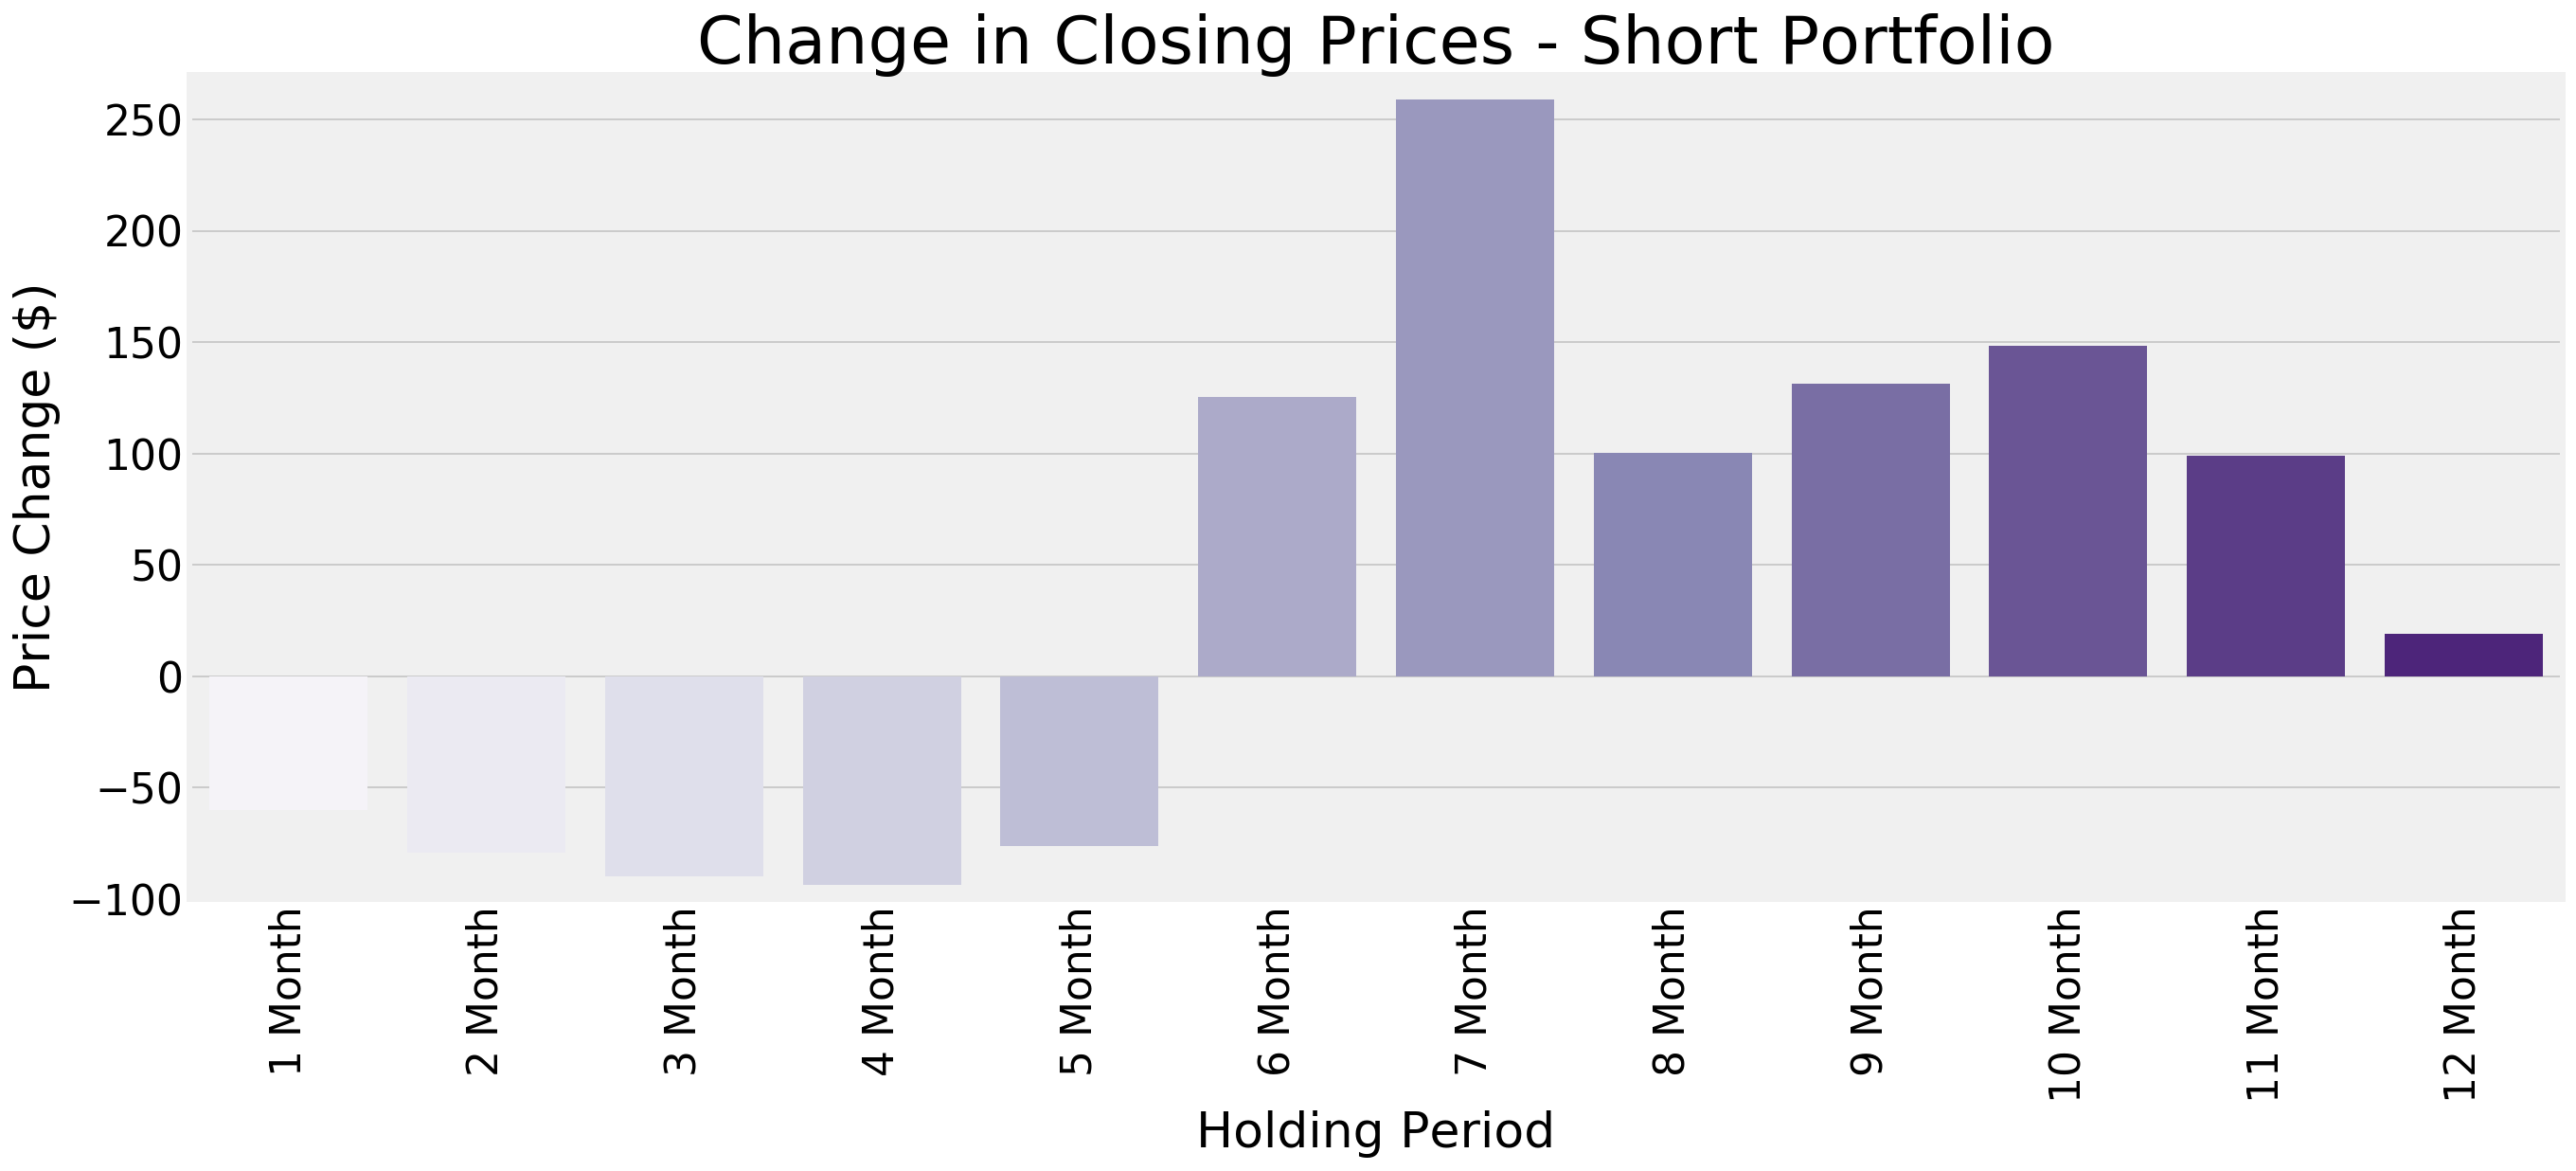

In [36]:
# Creating bar graph to visualize Long Portfolio

x = short_closing_prices.index
y = short_closing_prices.values

plt.figure(figsize=(20,8))
sns.barplot(x = x, y = y,palette='Purples')

plt.title('Change in Closing Prices - Short Portfolio',fontsize=35)
plt.ylim(-100,270)
plt.xlabel('Holding Period',fontsize=26)
plt.ylabel('Price Change ($)',fontsize=26)
plt.xticks(fontsize=22,rotation=90)
plt.yticks(fontsize=22)